# **Analisi Globale della Diffusione delle Tecnologie Digitali** 

La presente analisi documenta l’**evoluzione dell’adozione delle tecnologie digitali** nei paesi del mondo, dal 1980 al 2020. L'obiettivo è di fare analisi **storiche e comparative** tra paesi, continenti o regioni e studiare l’**evoluzione dell’infrastruttura digitale globale**, al fine di dimostrare l'espansione digitale degli ultimi 40 anni.

## **Dataset: `digital_technology_adoption`**

Offre una panoramica dettagliata dell’accesso a Internet, della diffusione della telefonia mobile e della connettività a banda larga, consentendo confronti sia temporali che geografici. Il file contiene **8.867 osservazioni** e **8 colonne**, corrispondenti a indicatori chiave sulla diffusione delle tecnologie digitali. Le colonne principali includono:

* **`Entity`**: nome del paese o della regione
* **`Code`**: codice a tre lettere associato al paese o alla regione
* **`Year`**: anno di riferimento dei dati
* **`Cellular Subscription`**: numero di abbonamenti mobile ogni 100 abitanti. 
* **`Internet Users (%)`**: percentuale della popolazione che utilizza Internet.
* **`No. of Internet Users`**: numero assoluto di utenti Internet.
* **`Broadband Subscription`**: abbonamenti alla banda larga fissa ogni 100 abitanti.


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
# Stile 
plt.style.use("dark_background")
sns.set_style("white")
plt.rcParams.update({
    "figure.facecolor": "#050b18",
    "axes.facecolor": "#050b18",
    "savefig.facecolor": "#050b18",
    "axes.edgecolor": "#cccccc",
    "axes.labelcolor": "#cccccc",
    "xtick.color": "#cccccc",
    "ytick.color": "#cccccc",
    "text.color": "#cccccc",
    "font.family": "monospace",
    "font.weight": "bold"
})
plt.rcParams['font.family'] = 'Segoe UI'
df = pd.read_csv("Final.csv")

### **Crescita Globale degli utenti che utilizzano internet** 

La visualizzazione mostra l’**evoluzione del numero totale di utenti che usano internet** nel mondo, su base annuale, dal 1980 al 2020. I dati sono aggregati a livello globale: per ciascun anno viene calcolata la **somma degli utenti Internet** di tutti i paesi presenti nel dataset.
Questa crescita esponenziale riflette il **potenziamento delle infrastrutture digitali globali**, la **diffusione di massa di dispositivi connessi** (smartphone, PC, tablet), l’**aumento dell’accessibilità e inclusione digitale** a livello mondiale.




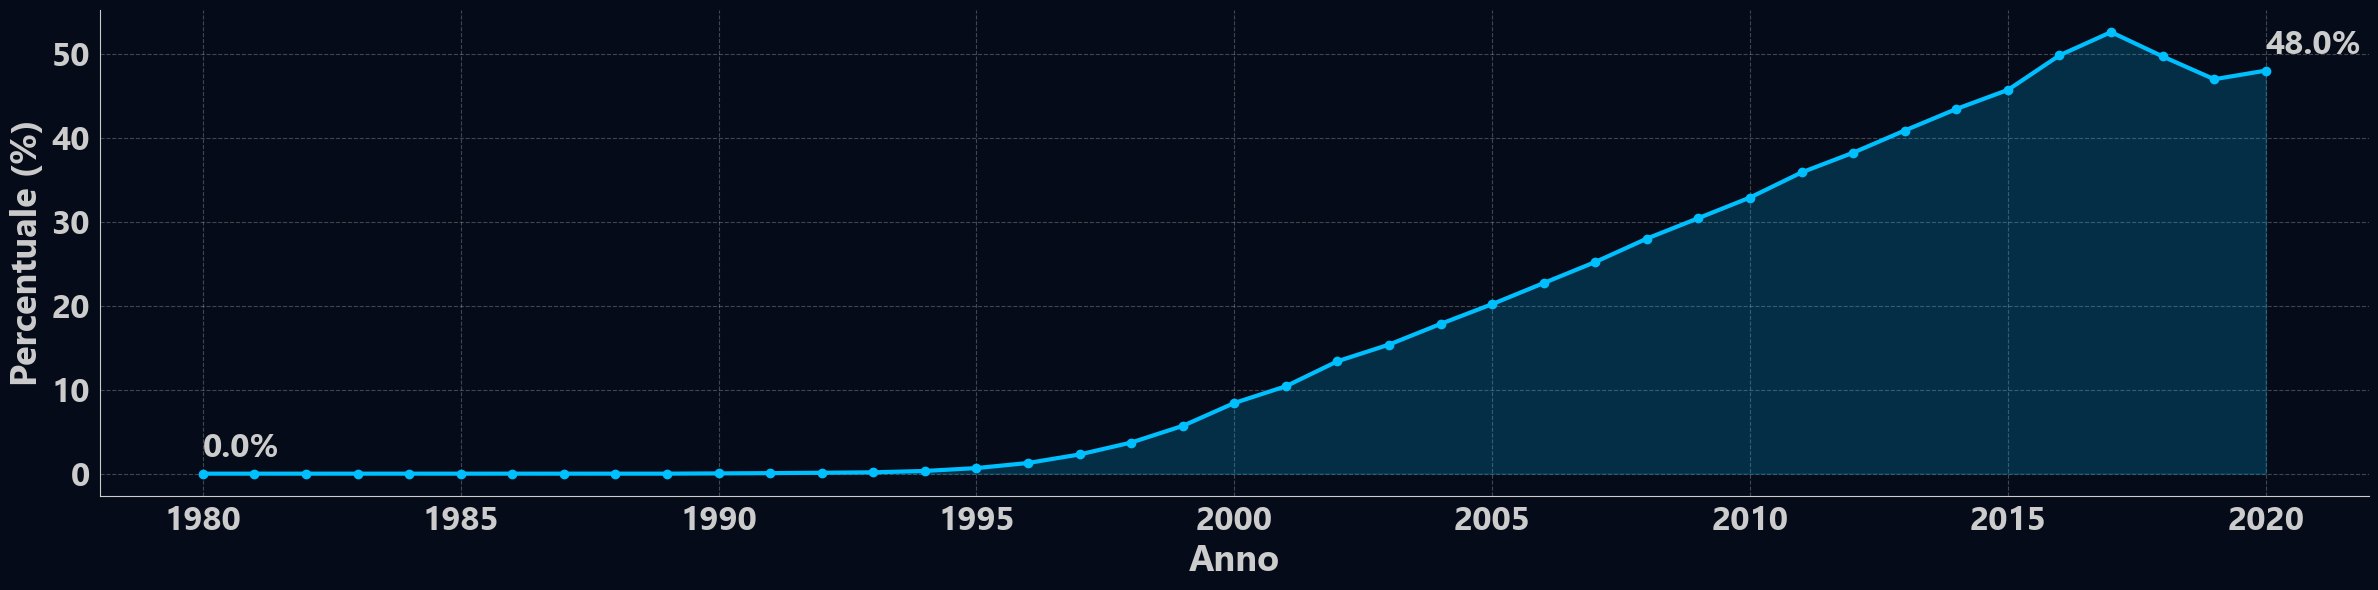

In [89]:
# media annuale della percentuale di utenti che usano internet su tutti i paesi
avg_pct = df.groupby("Year")["Internet Users(%)"].mean().reset_index()
plt.figure(figsize=(24, 6))
#linea principale che rappresenta l'evoluzione della percentuale media
plt.plot(
    avg_pct["Year"],
    avg_pct["Internet Users(%)"],
    marker="o",
    markersize=6,
    linewidth=3,
    color="deepskyblue"
    )
# riempimento sotto curva 
plt.fill_between(
    avg_pct["Year"],
    avg_pct["Internet Users(%)"],
    color="deepskyblue",
    alpha=0.2
   )
# etichette testuali 
plt.text(
    avg_pct["Year"].iloc[0], 
    avg_pct["Internet Users(%)"].iloc[0] + 2,
    f"{avg_pct['Internet Users(%)'].iloc[0]:.1f}%", 
    fontsize=24, 
    weight="bold"
    )
plt.text(
    avg_pct["Year"].iloc[-1], 
    avg_pct["Internet Users(%)"].iloc[-1] + 2,
    f"{avg_pct['Internet Users(%)'].iloc[-1]:.1f}%", 
    fontsize=24, 
    weight="bold"
    )
 # titolo e assi
plt.title("", fontweight="bold", fontsize=26)  
plt.xlabel("Anno", fontweight="bold", fontsize=26)  
plt.ylabel("Percentuale (%)", fontweight="bold", fontsize=26)  
# griglia 
plt.grid(True, which='major', linestyle='--', alpha=0.3)
# rimozione  bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
plt.tick_params(axis='both', labelsize=24)  
plt.tight_layout()
plt.show()

### **Percentuale media di popolazione con acceso a internet**

Questo grafico rappresenta l’**andamento della percentuale media di popolazione connessa a internet** su scala globale, dal 1980 al 2020.Per ogni anno, viene calcolata la **media aritmetica** delle percentuali di utenti registrate nei vari paesi inclusi nel dataset.

* **Asse X**: anni 1980–2020
* **Asse Y**: percentuale media della popolazione connessa a Internet


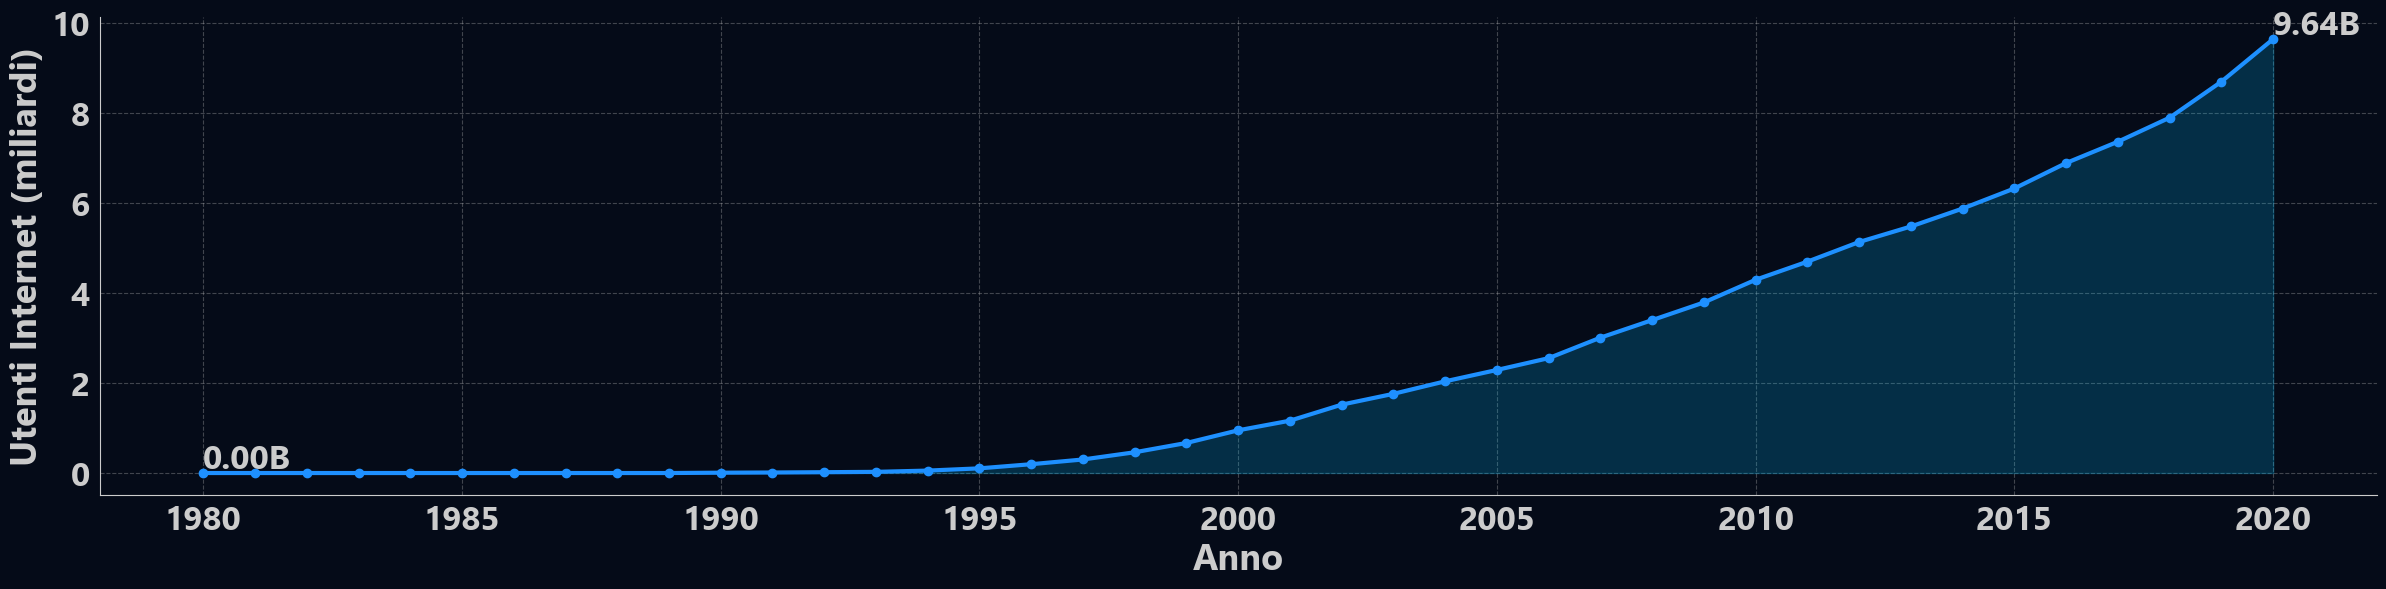

In [90]:
# raggrupamento dei dati per anno e somma del  numero totale di utenti su internet a livello globale
global_data = df.groupby("Year")["No. of Internet Users"].sum().reset_index()
# conversiione numero utenti da miliardi a milioni
global_data["Users_in_Billions"] = global_data["No. of Internet Users"] / 1e9
plt.figure(figsize=(24, 6))
# curva
plt.plot(
    global_data["Year"],
    global_data["Users_in_Billions"],
    marker="o",
    markersize=6,
    linewidth=3,
    color="dodgerblue"
)
# riempimento
plt.fill_between(
    global_data["Year"],
    global_data["Users_in_Billions"],
    color="deepskyblue",
    alpha=0.2
)
# etichette testuali 
plt.text(
    global_data["Year"].iloc[0],
    global_data["Users_in_Billions"].iloc[0] + 0.1,
    f"{global_data['Users_in_Billions'].iloc[0]:.2f}B",
    fontsize=24, 
    weight="bold"
)
plt.text(
    global_data["Year"].iloc[-1],
    global_data["Users_in_Billions"].iloc[-1] + 0.1,
    f"{global_data['Users_in_Billions'].iloc[-1]:.2f}B",
    fontsize=24, 
    weight="bold"
)
# Titolo e assi
plt.xlabel("Anno", fontweight="bold", fontsize=26)  
plt.ylabel("Utenti Internet (miliardi)", fontweight="bold", fontsize=26)  
# griglia 
plt.grid(True, which='major', linestyle='--', alpha=0.3)
# pulizia dei bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(axis='both', labelsize=24) 
plt.tight_layout()
plt.show()

### **Classifica dei dieci paesi per numero di utenti connessi ad internet** 

Questa visualizzazione mostra i **10 paesi con il maggior numero di utenti connessi ad internet** nel **2020**, anno più recente disponibile nel dataset. Sono esclusi aggregati geografici (es. *World*, *Asia*, *Europe*), l'analisi è quindi incentrata sui **singoli stati sovrani**.

* **Asse Y**: paesi (in ordine decrescente per numero di utenti)
* **Asse X**: numero di utenti (in milioni di persone)

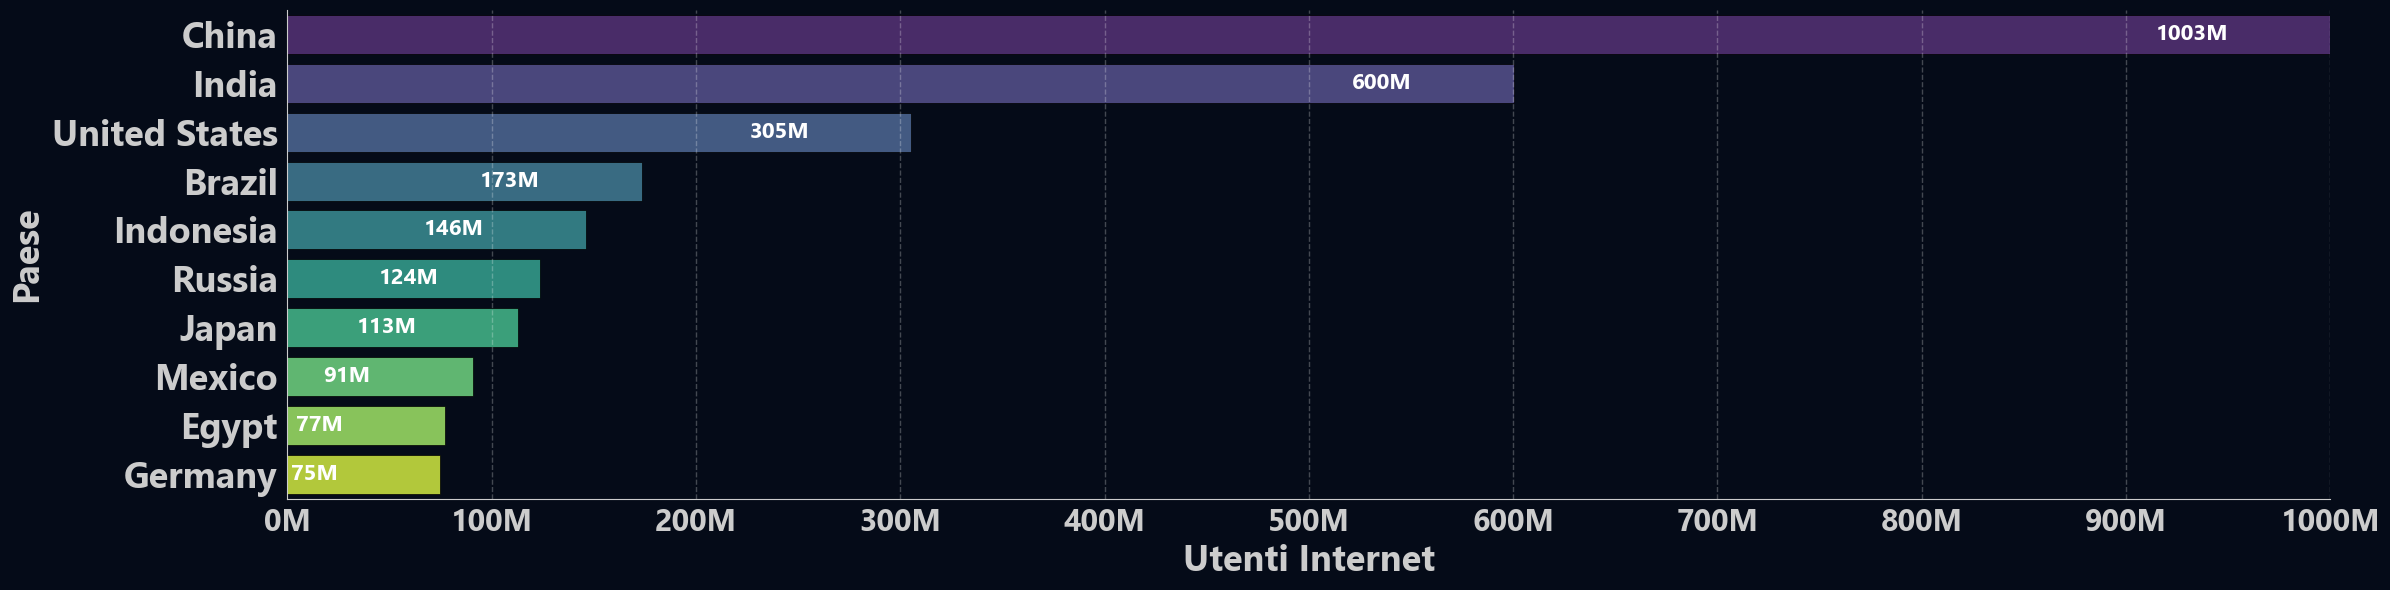

In [91]:
plt.rcParams['font.family'] = 'Segoe UI'
# filtro per anno piu recente registrato nel dataset (2020)
df_latest = df[df["Year"] == df["Year"].max()]
# esclusione di celle aggregate geograficamente)
df_filtered = df_latest[~df_latest["Entity"].isin(["World", "North America", "Europe", "Asia", "Africa"])]
#10 paesi con il maggior numero di utenti
top10 = df_filtered.sort_values("No. of Internet Users", ascending=False).head(10)
# creazione di una nuova colonna con limite 1 mld (val massimo)
top10["Plot_Users"] = top10["No. of Internet Users"].clip(upper=1_000_000_000)
plt.figure(figsize=(24, 6))
# costruzione barplot
barplot = sns.barplot(
    data=top10,
    x="Plot_Users",
    y="Entity",
    hue="Entity",
    palette="viridis",
    dodge=False,
    legend=False,
    edgecolor="black",
    linewidth=0.5
)
# inserimento valore (esatto) dentro ogni barra
for index, value in enumerate(top10["No. of Internet Users"]):
    barplot.text(
        min(value, 1_000_000_000) - 5e7,
        index,
        f"{value / 1e6:.0f}M",
        color="white",
        fontweight="bold",
        ha="right",
        va="center",
        fontsize=16
    )
# linee verticali per ogni etichetta
for x in range(100_000_000, 1_000_000_001, 100_000_000):
    plt.axvline(x=x, color="white", linestyle="--", alpha=0.25, linewidth=1)
# etichette asse x
plt.xticks(
    ticks=np.arange(0, 1_000_000_001, 100_000_000),
    labels=[f"{x//1_000_000}M" for x in range(0, 1_000_000_001, 100_000_000)],
    fontsize=22
)
# limite  asse x a 1mld
plt.xlim(0, 1_000_000_000)
# etichette  assi
plt.xlabel("Utenti Internet", fontweight="bold", fontsize=26)
plt.ylabel("Paese", fontweight="bold", fontsize=26)
# etichette asse y
plt.tick_params(axis='y', labelsize=26)
# rimozione i bordi 
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()